# Competition : APTOS 2019 Blindness Detection

- Computer Vision
- Image classification : 0 - No DR / 1 - Mild / 2 - Moderate / 3 - Severe / 4 - Proliferative DR
- Evaluation : Cohen's quadratically weighted kappa -> Making it as regression problem <br>
https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps
- Datasets : Train set(3662), Test set(1928) -> Need for data augmentation or find additional data  <br>
https://www.kaggle.com/benjaminwarner/resized-2015-2019-blindness-detection-images
- Image size : width(2896) height(1944)

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/train_images/ef476be214d4.png
/kaggle/input/aptos2019-blindness-detection/train_images/6dcde47060f9.png
/kaggle/input/aptos2019-blindness-detection/train_images/ec363f48867b.png
/kaggle/input/aptos2019-blindness-detection/train_images/17f6c7072f61.png
/kaggle/input/aptos2019-blindness-detection/train_images/b49b2fac2514.png
/kaggle/input/aptos2019-blindness-detection/train_images/af6166d57f13.png
/kaggle/input/aptos2019-blindness-detection/train_images/8d13c46e7d75.png
/kaggle/input/aptos2019-blindness-detection/train_images/c3b15bf9b4bc.png
/kaggle/input/aptos2019-blindness-detection/train_images/be68322c7223.png
/kaggle/input/aptos2019-blindness-detection/train_images/88e4399d207c.png
/kaggle/input/aptos2019-blindness-detection/train_images/0243404e8a00.png
/kaggle/input

/kaggle/input/aptos2019-blindness-detection/train_images/fe37f4492920.png
/kaggle/input/aptos2019-blindness-detection/train_images/e29e54ff921e.png
/kaggle/input/aptos2019-blindness-detection/train_images/4dd4a4bf2421.png
/kaggle/input/aptos2019-blindness-detection/train_images/76e589911303.png
/kaggle/input/aptos2019-blindness-detection/train_images/1177d583c807.png
/kaggle/input/aptos2019-blindness-detection/train_images/8b8fe3fc8950.png
/kaggle/input/aptos2019-blindness-detection/train_images/f55e1d2a19e4.png
/kaggle/input/aptos2019-blindness-detection/train_images/9fefe2b44795.png
/kaggle/input/aptos2019-blindness-detection/train_images/82088c6734e6.png
/kaggle/input/aptos2019-blindness-detection/train_images/697538183db5.png
/kaggle/input/aptos2019-blindness-detection/train_images/807135cbc438.png
/kaggle/input/aptos2019-blindness-detection/train_images/43bc7c066dfb.png
/kaggle/input/aptos2019-blindness-detection/train_images/bca2bdc15fc5.png
/kaggle/input/aptos2019-blindness-dete

/kaggle/input/aptos2019-blindness-detection/test_images/755615db51d3.png
/kaggle/input/aptos2019-blindness-detection/test_images/d8f6c660bf2d.png
/kaggle/input/aptos2019-blindness-detection/test_images/619ce2c77917.png
/kaggle/input/aptos2019-blindness-detection/test_images/94a6e4f3c625.png
/kaggle/input/aptos2019-blindness-detection/test_images/ee506d853270.png
/kaggle/input/aptos2019-blindness-detection/test_images/acd52452b9a2.png
/kaggle/input/aptos2019-blindness-detection/test_images/b0b0d564e6c6.png
/kaggle/input/aptos2019-blindness-detection/test_images/228769e96741.png
/kaggle/input/aptos2019-blindness-detection/test_images/a87e705d63ee.png
/kaggle/input/aptos2019-blindness-detection/test_images/8c49d9de02d6.png
/kaggle/input/aptos2019-blindness-detection/test_images/69d21c5c7dce.png
/kaggle/input/aptos2019-blindness-detection/test_images/2f042d9c1376.png
/kaggle/input/aptos2019-blindness-detection/test_images/c97946322879.png
/kaggle/input/aptos2019-blindness-detection/test_im

***
## Notebook 1. (ratthachat) APTOS : Eye Preprocessing in Diabetic Retinopathy
https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy

### Datasets
'aptos2019-blindness-detection','diabetic-retinopathy-resized','retinopathy-train-2015' -> later two just for testing the preprocessing methods

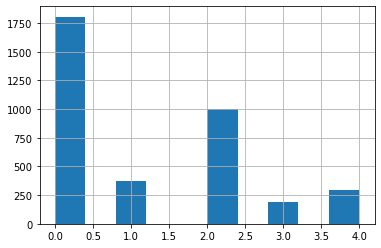

In [6]:
import os, sys
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv('../input/aptos2019-blindness-detection/train.csv')
df_test = pd.read_csv('../input/aptos2019-blindness-detection/test.csv')

x = df_train['id_code']
y = df_train['diagnosis']

y.hist()

### Data Preprocessing 
- 1) Prior ideas
    - Reducing lighting-condition effects : convert the image to gray scale

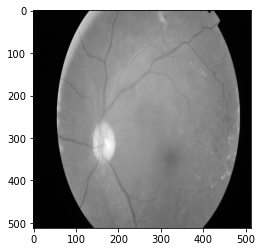

In [8]:
path=f"../input/aptos2019-blindness-detection/train_images/cd54d022e37d.png" #example
IMG_SIZE = 512

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

fig = plt.figure()
plt.imshow(image, cmap='gray')

- Ben Graham Method : Gray scale + Lighting condition

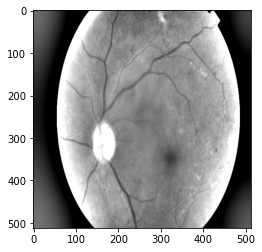

In [9]:
path=f"../input/aptos2019-blindness-detection/train_images/cd54d022e37d.png" #example
IMG_SIZE = 512

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = cv2.addWeighted (image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) # insightful way to improve lighting condition

fig = plt.figure()
plt.imshow(image, cmap='gray')


- Auto-Cropping uninformative black areas <br>
limitations : might not work to some outliers, works well with gray scale images but not to color images

In [4]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

- 2) Improved ideas : Modified Ben Method + Circle crop

    - Modified Ben Method : For color version, note that I use argument sigmaX = 30 of cv2.GaussianBlur, where Ben actually used sigmaX = 10 which may have better performance. I just feel that this sigmaX = 30 or sigmaX = 50 make beautiful [sometimes bloody] yellow moon pictures.
    - Circle crop(Create circular crop around image center) 

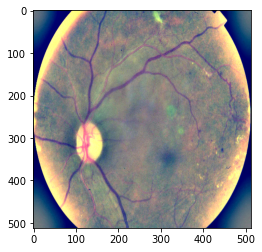

In [7]:
#Modified Ben Method with crop_image_from_gray not circle crop
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

path=f"../input/aptos2019-blindness-detection/train_images/cd54d022e37d.png" #example
IMG_SIZE = 512

image = load_ben_color(path,sigmaX=30)
fig = plt.figure()
plt.imshow(image)

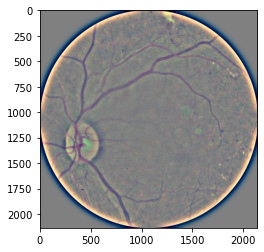

In [8]:
#Modified Ben Method with crop_image_from_gray with circle crop
def circle_crop(path, sigmaX=10):   
    
    img = cv2.imread(path)
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img

path=f"../input/aptos2019-blindness-detection/train_images/cd54d022e37d.png" #example

image = circle_crop(path,sigmaX=30)
fig = plt.figure()
plt.imshow(image)

***
## Notebook 2 : [tanlikesmath] Intro APTOS Diabetic Retinopathy (EDA & Starter)
https://www.kaggle.com/tanlikesmath/intro-aptos-diabetic-retinopathy-eda-starter/

### Datasets
competition datasets, ImageNet(transfer learning)

In [1]:
import pandas as pd
import os

base_image_dir = os.path.join('..', 'input/aptos2019-blindness-detection/')
train_dir = os.path.join(base_image_dir,'train_images/')
df = pd.read_csv(os.path.join(base_image_dir, 'train.csv'))
df['path'] = df['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
df = df.drop(columns=['id_code'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
df.head(10)

,diagnosis,path
0,2,../input/aptos2019-blindness-detection/train_i...
1,2,../input/aptos2019-blindness-detection/train_i...
2,2,../input/aptos2019-blindness-detection/train_i...
3,0,../input/aptos2019-blindness-detection/train_i...
4,2,../input/aptos2019-blindness-detection/train_i...
5,2,../input/aptos2019-blindness-detection/train_i...
6,0,../input/aptos2019-blindness-detection/train_i...
7,0,../input/aptos2019-blindness-detection/train_i...
8,2,../input/aptos2019-blindness-detection/train_i...
9,1,../input/aptos2019-blindness-detection/train_i...


### Data Preprocessing
- Used fastai.vision to transform data : label, transform(resize), convert them into ImageDataBunch and finally, normalize them

In [7]:
from fastai.vision import *
from fastai import *


#tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.1,p_lighting=0.5)
data = (ImageList.from_df(df=df,path='./',cols='path') #get dataset from dataset
        .split_by_rand_pct(0.2) #Splitting the dataset
        .label_from_df(cols='diagnosis',label_cls=FloatList) #obtain labels from the level column
        .transform(tfms,size=224,resize_method=ResizeMethod.SQUISH,padding_mode='zeros') #Data augmentation
        .databunch(bs=64,num_workers=4) #DataBunch
        .normalize(imagenet_stats) #Normalize     
       )

data.show_batch()

NameError: name 'ImageItemList' is not defined

### Training Model
- evaluation metric : cohen_kappa_score from sklearn.metrics

In [9]:
from sklearn.metrics import cohen_kappa_score
def quadratic_kappa(y_hat, y):
    return torch.tensor(cohen_kappa_score(torch.round(y_hat), y, weights='quadratic'),device='cuda:0')

- Framework : pytorch (import fastai)
- Pretrained model : ResNet50

In [ ]:
from fastai import *
learn = cnn_learner(data, base_arch=models.resnet50, metrics = [quadratic_kappa])

- parameter tuning : used learning rate finder (learn.lr_find())

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(4,max_lr = 1e-2)

In [ ]:
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-3))

In [ ]:
learn.recorder.plot_losses()
learn.recorder.plot_metrics()

In [ ]:
learn.export()

### Test predictions
- test data augmentation : TTA(test-time augmentation) 
- predictions

In [ ]:
valid_preds = learn.get_preds(ds_type=DatasetType.Valid)

- optimizing metric : OptimizedRounder from @abhishek

In [ ]:
class OptimizedRounder(object):
    def __init__(self):
        self.coef_ = 0

    def _kappa_loss(self, coef, X, y):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4

        ll = metrics.cohen_kappa_score(y, X_p, weights='quadratic')
        return -ll

    def fit(self, X, y):
        loss_partial = partial(self._kappa_loss, X=X, y=y)
        initial_coef = [0.5, 1.5, 2.5, 3.5]
        self.coef_ = sp.optimize.minimize(loss_partial, initial_coef, method='nelder-mead')
        print(-loss_partial(self.coef_['x']))

    def predict(self, X, coef):
        X_p = np.copy(X)
        for i, pred in enumerate(X_p):
            if pred < coef[0]:
                X_p[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                X_p[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                X_p[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                X_p[i] = 3
            else:
                X_p[i] = 4
        return X_p

    def coefficients(self):
        return self.coef_['x']

***
## Notebook3 : pytorch inference kernel + lazy TTA
https://www.kaggle.com/abhishek/pytorch-inference-kernel-lazy-tta

### Datasets : competition datasets

### Data preprocessing : from torchvision import transforms
(**Assuming not revealing preprocessing methods)

### Training Model
- Framework : Pytorch
- Pretrained Model : 'resnet101'
- Parameters : 

### Test prediction
- test data transform/augmentation

***
## Notebook 4: APTOS 2019: DenseNet Keras Starter

### Datasets : Competition datasets, ImageNet

### Data preprocessing
- Resize Images: We will resize both the training and test images to 224x224, so that it matches the ImageNet format.
- Mixup & Data Generator: We show how to create a data generator that will perform random transformation to our datasets (flip vertically/horizontally, rotation, zooming). This will help our model generalize better to the data, since it is fairly small (only ~3000 images).

### Training Model
- Pretrained model : DenseNet-121 pre-trained on ImageNet
- Adam for 15 epochs

***
## Notebook 5 : Starter kernel for > 0.79 (Public Score 0.783583)
https://www.kaggle.com/drhabib/starter-kernel-for-0-79

***
## Notebook 6 : EfficientNetB5 with Keras (APTOS 2019)
https://www.kaggle.com/carlolepelaars/efficientnetb5-with-keras-aptos-2019

### Datasets : Competition datasets

### Data preprocessing
- Using Notebook 1's idea (https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy)
- Data augmentation : flip the data both horizontally and vertically, and then divide the data by 128 for normalization
    
### Training Model
- Framework : Keras
- Pretrained model : EfficientNet(pretrained on ImageNet, which introduces a systematic way to scale CNN in a nearly optimal way) B5 version -> Image size = (456, 456, 3)
- Optimizer : RAdam(it often yields better convergence than Vanilla Adam) by CyberZHG  
- Group Normalization instead of Batch Normalization (since it becomes unstable with small batch sizes (<16))
- We also stop training if the MSE on the validation set doesn't go down for 4 epochs. This way we can counter overfitting. (cf. Another option we could use is to directly use Quadratic Weighted Kappa as a loss function)